In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
%cd /content/drive/MyDrive/PS1/Heart Attack

/content/drive/MyDrive/PS1/Heart Attack


In [ ]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data.bmi.replace(to_replace=np.nan, value=data.bmi.mean(), inplace=True)

In [ ]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Visualisation

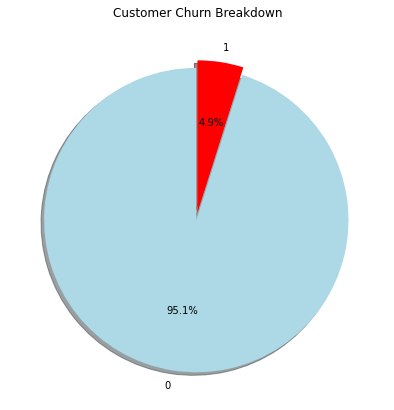

In [ ]:
labels =data['stroke'].value_counts(sort = True).index
sizes = data['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Customer Churn Breakdown')
plt.show()

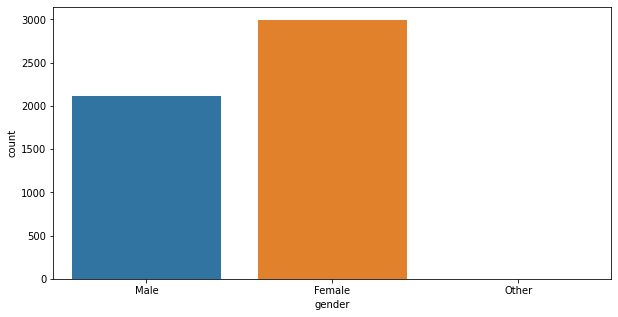

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='gender');

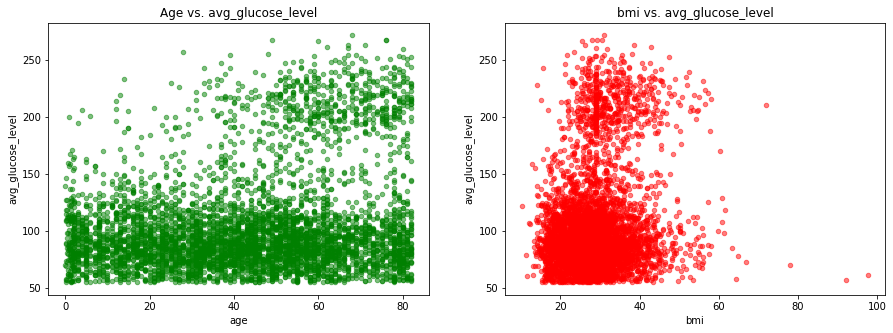

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
data.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")
data.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

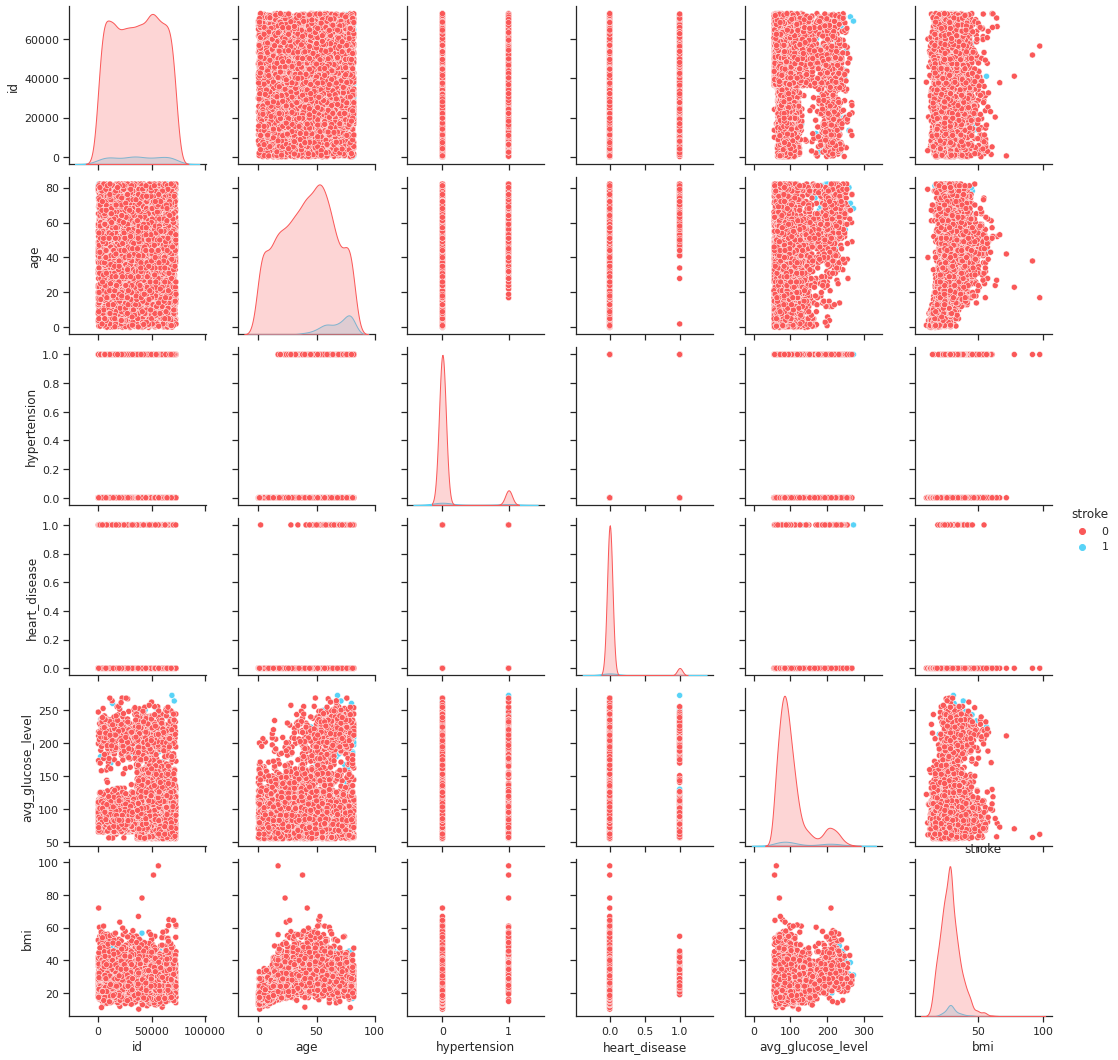

In [ ]:
sns.set(style="ticks");
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(data, hue="stroke", palette=pal);
plt.title("stroke");

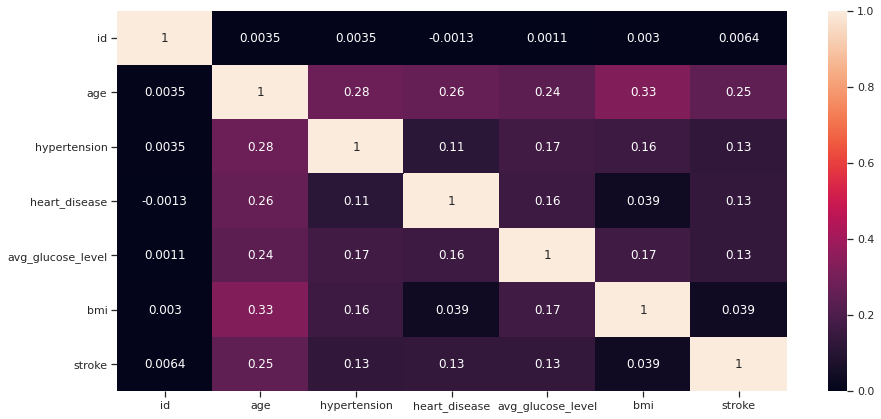

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True);


There is no correlation between stroke and BMI

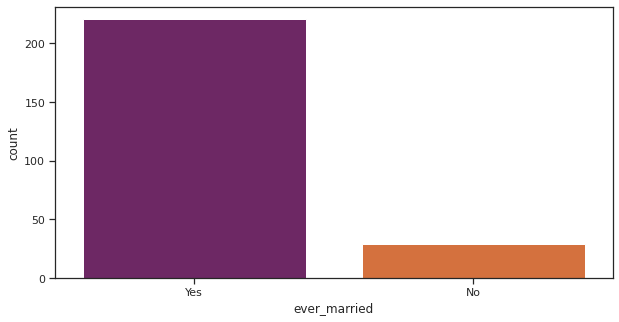

In [ ]:
plt.figure(figsize=(10,5))
strok=data.loc[data['stroke']==1]
sns.countplot(data=strok,x='ever_married',palette='inferno');


Being married highly correlated with stroke, however this might just be because older people are more likely to get stroke and older people are married

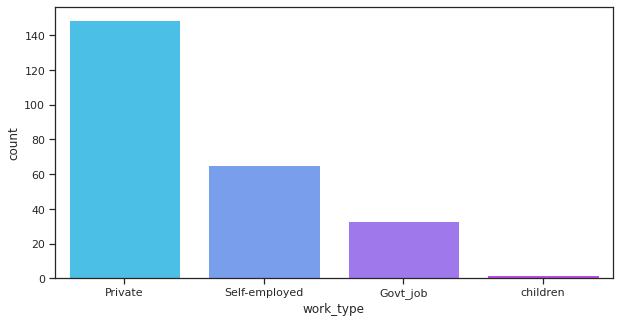

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='work_type',palette='cool');


Private work exposes you to more stroke


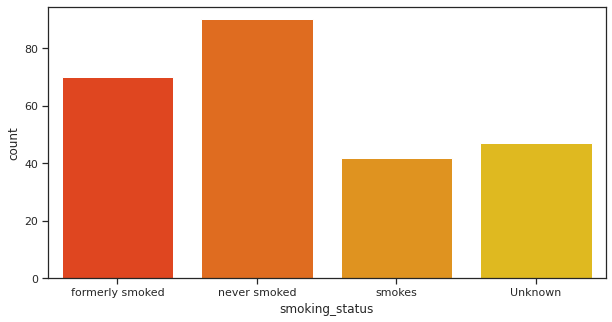

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='smoking_status',palette='autumn');


Being a smoker or a formerly smoker increases your risk of having a stroke

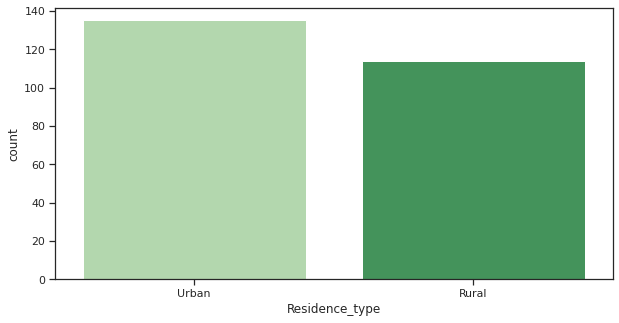

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='Residence_type',palette='Greens');


Residence Type has nothing to do with stroke, We cannot take it as a standard

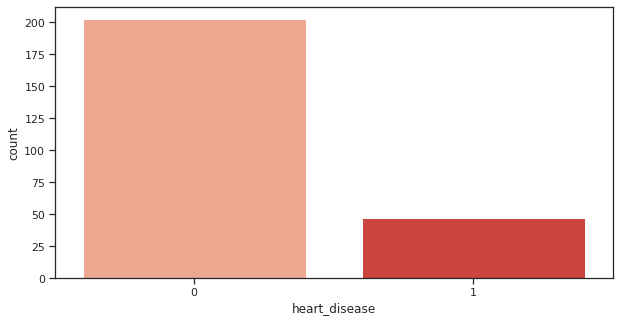

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='heart_disease',palette='Reds');


Most people who have had a stroke do not have any heart disease

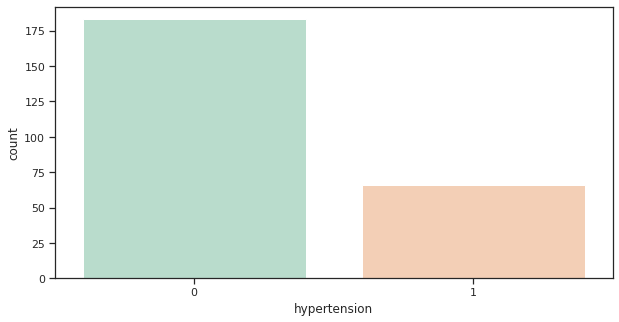

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='hypertension',palette='Pastel2');

more than 25% of stroke cases,they had hypertension

# New approach

In [ ]:
cat_features = ['work_type', 'gender', 'Residence_type', 'smoking_status', 'ever_married']
num_features = ['age', 'avg_glucose_level', 'bmi']

In [ ]:
# label encoding
cat_maps = {'work_type': {'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4},
            'gender': {'Male':0, 'Female':1},
            'Residence_type': {'Urban':0, 'Rural':1},
            'smoking_status': {'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3},
            'ever_married': {'Yes':0, 'No':1}
}

In [ ]:
data['work_type'] = data['work_type'].map(cat_maps['work_type'])
data['gender'] = data['gender'].map(cat_maps['gender'])
data['Residence_type'] = data['Residence_type'].map(cat_maps['Residence_type'])
data['smoking_status'] = data['smoking_status'].map(cat_maps['smoking_status'])
data['ever_married'] = data['ever_married'].map(cat_maps['ever_married'])

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0,1,0,0,0,228.69,36.600000,0,1
1,51676,1.0,61.0,0,0,0,1,1,202.21,28.893237,1,1
2,31112,0.0,80.0,0,1,0,0,1,105.92,32.500000,1,1
3,60182,1.0,49.0,0,0,0,0,0,171.23,34.400000,2,1
4,1665,1.0,79.0,1,0,0,1,1,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,1,0,0,0,0,83.75,28.893237,1,0
5106,44873,1.0,81.0,0,0,0,1,0,125.20,40.000000,1,0
5107,19723,1.0,35.0,0,0,0,1,1,82.99,30.600000,1,0
5108,37544,0.0,51.0,0,0,0,0,1,166.29,25.600000,0,0


In [ ]:
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender',
 'work_type',
 'smoking_status']

label = ['stroke']

X = data[features]
y = data[label]

In [ ]:
X.gender=(X.gender.fillna(1))

X.isnull().sum()

age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               0
work_type            0
smoking_status       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test=train_test_split(X, y,test_size=0.2,random_state=42, stratify = y)

In [ ]:
# SMOTE 

from imblearn.over_sampling import SMOTENC

smote = SMOTENC([1,2,3,4,7,8,9])
X_train , y_train = smote.fit_resample(X_train, y_train)

In [ ]:
X_train = pd.DataFrame(data = X_train, columns = features)
X_test = pd.DataFrame(data = X_test, columns = features)

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 3.9 MB/s 


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from matplotlib import pyplot
import category_encoders as ce

# Base Model

In [ ]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

In [ ]:
base_acc = cross_val_score(estimator= LogisticRegression(), X = X_train, y = y_train, cv = skf, scoring = 'f1_weighted')
print('Base F1 Score = {:.4f}'.format(np.mean(base_acc)))

Base F1 Score = 0.7966


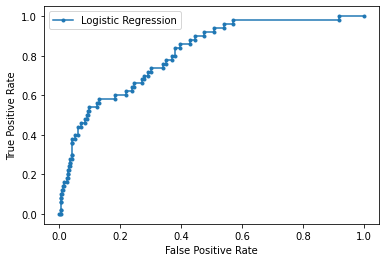

Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.76      0.85       972
           1       0.12      0.64      0.20        50

    accuracy                           0.75      1022
   macro avg       0.55      0.70      0.53      1022
weighted avg       0.93      0.75      0.82      1022


Confusion matrix: 
[[737 235]
 [ 18  32]]

ROC AUC Score: 0.70


In [ ]:
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cr = classification_report(y_test, y_pred)
  
cm = confusion_matrix(y_test, y_pred)

roc = roc_auc_score(y_test, y_pred)

predicted_probab = model.predict_proba(X_test)
predicted_probab = predicted_probab[:, 1]

fpr, tpr, _ = roc_curve(y_test, predicted_probab)
pyplot.plot(fpr, tpr, marker='.', label='Logistic Regression')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()


print("Classification report: ")
print(cr)
print('')

print("Confusion matrix: ")
print(cm)
print('')

print('ROC AUC Score: {:.2f}'.format(roc))

# Basic

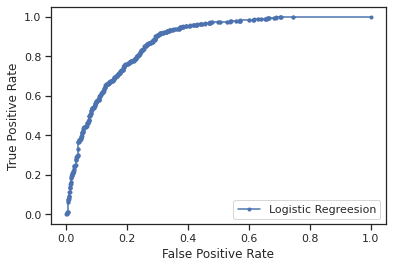

Logistic Regreesion :
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       973
           1       0.77      0.84      0.80       972

    accuracy                           0.79      1945
   macro avg       0.80      0.79      0.79      1945
weighted avg       0.80      0.79      0.79      1945


Confusion matrix: 
[[726 247]
 [154 818]]

ROC AUC Score: 0.79

F1 score: 0.80
-----------------------------------



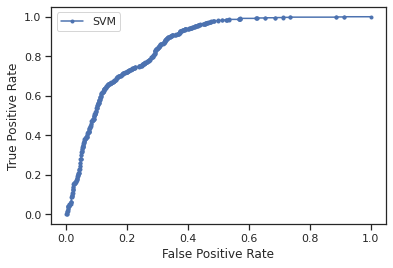

SVM :
Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       973
           1       0.74      0.81      0.77       972

    accuracy                           0.76      1945
   macro avg       0.76      0.76      0.76      1945
weighted avg       0.76      0.76      0.76      1945


Confusion matrix: 
[[693 280]
 [185 787]]

ROC AUC Score: 0.76

F1 score: 0.77
-----------------------------------



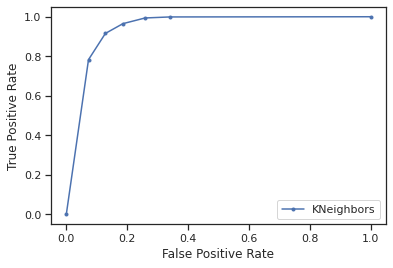

KNeighbors :
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       973
           1       0.84      0.97      0.90       972

    accuracy                           0.89      1945
   macro avg       0.90      0.89      0.89      1945
weighted avg       0.90      0.89      0.89      1945


Confusion matrix: 
[[792 181]
 [ 34 938]]

ROC AUC Score: 0.89

F1 score: 0.90
-----------------------------------



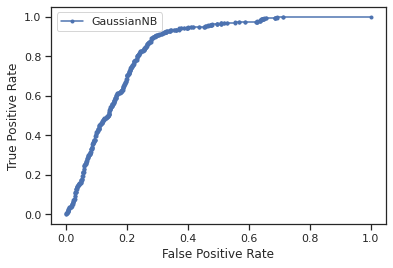

GaussianNB :
Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       973
           1       0.72      0.93      0.81       972

    accuracy                           0.79      1945
   macro avg       0.81      0.79      0.78      1945
weighted avg       0.81      0.79      0.78      1945


Confusion matrix: 
[[622 351]
 [ 64 908]]

ROC AUC Score: 0.79

F1 score: 0.81
-----------------------------------



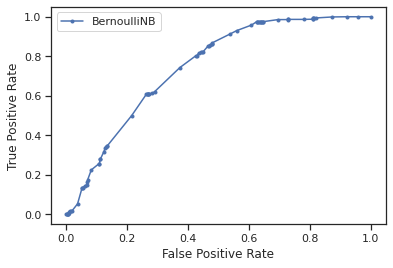

BernoulliNB :
Classification report: 
              precision    recall  f1-score   support

           0       0.78      0.53      0.63       973
           1       0.65      0.85      0.74       972

    accuracy                           0.69      1945
   macro avg       0.71      0.69      0.68      1945
weighted avg       0.72      0.69      0.68      1945


Confusion matrix: 
[[517 456]
 [142 830]]

ROC AUC Score: 0.69

F1 score: 0.74
-----------------------------------



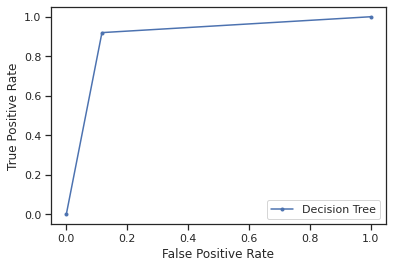

Decision Tree :
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       973
           1       0.89      0.92      0.90       972

    accuracy                           0.90      1945
   macro avg       0.90      0.90      0.90      1945
weighted avg       0.90      0.90      0.90      1945


Confusion matrix: 
[[859 114]
 [ 78 894]]

ROC AUC Score: 0.90

F1 score: 0.90
-----------------------------------



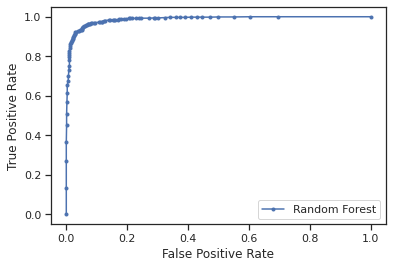

Random Forest :
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       973
           1       0.93      0.96      0.94       972

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945


Confusion matrix: 
[[901  72]
 [ 37 935]]

ROC AUC Score: 0.94

F1 score: 0.94
-----------------------------------



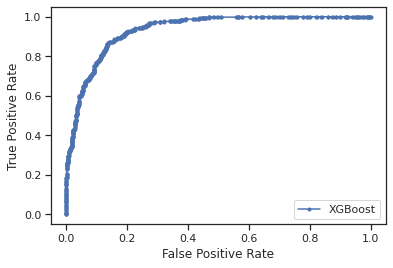

XGBoost :
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       973
           1       0.82      0.91      0.87       972

    accuracy                           0.86      1945
   macro avg       0.86      0.86      0.86      1945
weighted avg       0.86      0.86      0.86      1945


Confusion matrix: 
[[783 190]
 [ 83 889]]

ROC AUC Score: 0.86

F1 score: 0.87
-----------------------------------



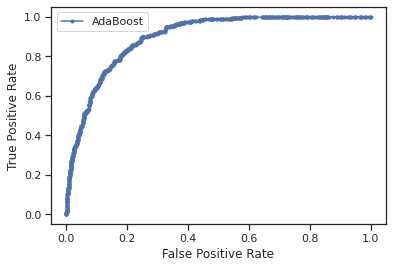

AdaBoost :
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       973
           1       0.79      0.86      0.82       972

    accuracy                           0.82      1945
   macro avg       0.82      0.82      0.82      1945
weighted avg       0.82      0.82      0.82      1945


Confusion matrix: 
[[749 224]
 [134 838]]

ROC AUC Score: 0.82

F1 score: 0.82
-----------------------------------



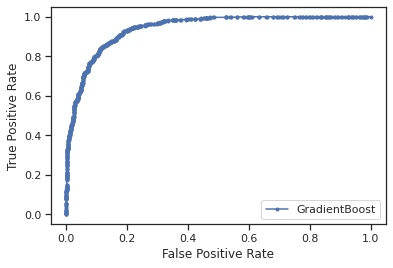

GradientBoost :
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       973
           1       0.83      0.91      0.87       972

    accuracy                           0.87      1945
   macro avg       0.87      0.87      0.86      1945
weighted avg       0.87      0.87      0.86      1945


Confusion matrix: 
[[795 178]
 [ 84 888]]

ROC AUC Score: 0.87

F1 score: 0.87
-----------------------------------



In [ ]:
models = []
models.append(['Logistic Regreesion', LogisticRegression()])
models.append(['SVM', SVC(probability=True)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier()])
models.append(['Random Forest', RandomForestClassifier()])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])
models.append(['AdaBoost', AdaBoostClassifier()])
models.append(['GradientBoost', GradientBoostingClassifier()])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cr = classification_report(y_test, y_pred)
      
    cm = confusion_matrix(y_test, y_pred)
 
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)

    predicted_probab = model.predict_proba(X_test)
    predicted_probab = predicted_probab[:, 1]

    fpr, tpr, _ = roc_curve(y_test, predicted_probab)
    pyplot.plot(fpr, tpr, marker='.', label=models[m][0])
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.legend()
    pyplot.show()
   
    print(models[m][0],':')

    print("Classification report: ")
    print(cr)
    print('')

    print("Confusion matrix: ")
    print(cm)
    print('')

    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')

    print('F1 score: {:.2f}'.format(f1))
    
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append(roc)
    lst_2.append(f1)
    lst_1.append(lst_2)

In [ ]:
df = pd.DataFrame(lst_1, columns= ['Model','ROC AUC','F1'])
df.sort_values(by= ['ROC AUC', 'F1'], inplace= True, ascending= False)
df

,Model,ROC AUC,F1
6,Random Forest,0.943968,0.944922
5,Decision Tree,0.901295,0.903030
2,KNeighbors,0.889499,0.897178
9,GradientBoost,0.865320,0.871443
7,XGBoost,0.859668,0.866894
8,AdaBoost,0.815962,0.823992
0,Logistic Regreesion,0.793855,0.803142
3,GaussianNB,0.786708,0.813985
1,SVM,0.760950,0.771947
4,BernoulliNB,0.692628,0.735164


# Hyperparameter Tuning

In [ ]:
tree_mapper = ColumnTransformer(transformers=[('num', StandardScaler(), num_features),
                                         ('ce', ce.CatBoostEncoder(), cat_features)
                                         ], remainder= 'passthrough')

linear_mapper = ColumnTransformer(transformers=[('num', StandardScaler(), num_features),
                                         ('ce', ce.OneHotEncoder(), cat_features)
                                         ], remainder= 'passthrough')

num_mapper = ColumnTransformer(transformers=[('num', StandardScaler(), num_features)
                                         ], remainder= 'drop')

In [ ]:


models = [
          Pipeline([('mapper', linear_mapper), ('classifier', LogisticRegression())]),
          Pipeline([('mapper', num_mapper), ('classifier', KNeighborsClassifier())]),
          Pipeline([('classifier', GaussianNB())]),
          Pipeline([('classifier', BernoulliNB())]),
          Pipeline([('mapper', mapper), ('classifier', DecisionTreeClassifier())]),
          Pipeline([('mapper', mapper), ('classifier', RandomForestClassifier())]),
          Pipeline([('mapper', mapper), ('classifier', XGBClassifier())]),
          Pipeline([('mapper', mapper), ('classifier', GradientBoostingClassifier())]),
          Pipeline([('mapper', mapper), ('classifier', SVC(probability= True))]),
          Pipeline([('mapper', mapper), ('classifier', AdaBoostClassifier(
              base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                      max_depth = None,
                                                      max_features = None,
                                                      min_samples_leaf = 1,
                                                      min_samples_split = 2,
                                                      random_state = 0)))])
]

model_grids = [
               [{'classifier__C':[1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1, 5, 1e1, 5e1, 1e2, 5e2, 1e3],
                 'classifier__random_state':[0]}],                                #logistic
               
               [{'classifier__n_neighbors':[5,7,9,11, 13, 15, 17, 19], 
                 'classifier__metric': ['euclidean', 'manhattan', 'minkowski']}],  #KNN
               
               [{'classifier__var_smoothing': [1e-10, 1e-09, 1e-8, 1e-7]}],                                   #GaussianNB

               [{'classifier__alpha': [1e-2, 1e-1, 1, 1e1, 1e2]}],                                #BernoulliNB

               [{'classifier__criterion':['gini','entropy'],
                 'classifier__random_state':[0], 
                 'classifier__max_depth' : [3, 5, 8, 10, 15, None], 
                 'classifier__min_samples_split' : [1,2,5,10,15,30],
                 'classifier__min_samples_leaf': [1,2,5,10], 
                 'classifier__max_features': ['log2', 'sqrt', None]}],         #DT
               
               [{'classifier__criterion':['gini','entropy'],
                 'classifier__n_estimators': [1000],
                 'classifier__random_state':[0], 
                 'classifier__max_depth' : [3, 5, 8, 10, 15, None], 
                 'classifier__min_samples_split' : [1,2,5,10,15,30],
                 'classifier__min_samples_leaf': [1,2,5,10], 
                 'classifier__max_features': ['log2', 'sqrt', None]}],         #RF

               [{'classifier__n_estimators':[1000],
                 'classifier__criterion':['gini','entropy'],
                 'classifier__random_state':[0],
                 'classifier__max_depth': [3, 5, 8, 10, 15, 30],
                 'classifier__min_child_weight': [2,4,6,8,10],
                 'classifier__gamma': [0, 0.1, 0.2, 0.3],
                 'classifier__reg_alpha':[0, 0.001, 0.005, 0.01, 0.05],
                 'classifier__colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                 'classifier__eta': [0.1, 0.2, 0.3, 0.4, 0.5]}],                 #XGBoost
               
               [{'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2], 
                 'classifier__n_estimators': [1000],
                 'classifier__random_state':[0],
                 'classifier__max_depth' : [5, 8, 15, None], 
                 'classifier__min_samples_split' : [1,2,5,10],
                 'classifier__min_samples_leaf': [1,2,5,10], 
                 'classifier__max_features': ['log2', 'sqrt', 'auto', 'None']}],  #GBDT
                        

               [{'classifier__C':[1e-1, 1, 1e1] ,
                 'classifier__random_state':[0],
                 'classifier__kernel': ['rbf', 'poly'],
                 'classifier__degree': 2}],                                        #SVC
               
               [{'classifier__n_estimators' : [800, 1000, 1200], 
                 'classifier__learning_rate' : [1e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1, 1e1],
                 'classifier__random_state':[0]}]             #AdaBoost
]            
          

In [ ]:



for i,j in zip(models, model_grids):
    grid = RandomizedSearchCV(estimator=i, param_distributions=j, n_iter = 100, scoring='f1_weighted', cv = skf)
    grid.fit(X_train, y_train)
    best_f1 = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest F1 : {:.4f}%'.format(i.steps[-1],best_f1))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

('classifier', AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
     

#Tuned Models

In [ ]:
models_tuned = []
models_tuned.append(Pipeline([('mapper', linear_mapper),  ('classifier', LogisticRegression(random_state = 0))]))
models_tuned.append(Pipeline([('mapper', num_mapper),  ('classifier', KNeighborsClassifier(n_neighbors=5, 
                                                                                           metric = 'manhattan'))]))
models_tuned.append(Pipeline([('classifier', GaussianNB(var_smoothing= 1e-7))]))
models_tuned.append(Pipeline([('classifier', BernoulliNB(alpha= 100))]))
models_tuned.append(Pipeline([('mapper', linear_mapper),  ('classifier', SVC(C=1, random_state = 0, probability= True))]))

models_tuned.append(Pipeline([('mapper', tree_mapper),  
                              ('classifier', 
                               DecisionTreeClassifier(criterion='entropy',
                                                      max_depth = None,
                                                      max_features = None,
                                                      min_samples_leaf = 1,
                                                      min_samples_split = 2,
                                                      random_state = 0)
                               )]))
models_tuned.append(Pipeline([('mapper', tree_mapper),  
                              ('classifier', 
                               RandomForestClassifier(n_estimators = 1000,
                                                      criterion='entropy',
                                                      max_depth = None,
                                                      max_features = 'sqrt',
                                                      min_samples_leaf = 1,
                                                      min_samples_split = 10,
                                                      random_state = 0)
                               )]))

models_tuned.append(Pipeline([('mapper', tree_mapper),  
                              ('classifier', 
                               AdaBoostClassifier(base_estimator= DecisionTreeClassifier(criterion='gini',
                                                      max_depth = 30,
                                                      max_features = 'log2',
                                                      min_samples_leaf = 5,
                                                      min_samples_split = 15,
                                                      random_state = 0),
                                                  learning_rate = 0.1,
                                                  n_estimators = 500)
                               )]))

models_tuned.append(Pipeline([('mapper', tree_mapper),  
                              ('classifier', XGBClassifier(criterion = 'gini',
                                                           eta = 0.1,
                                                           max_depth = 8,
                                                           n_estimators = 500,
                                                           random_state = 0
                                                           ))]))

models_tuned.append(Pipeline([('mapper', tree_mapper),  
                              ('classifier', GradientBoostingClassifier(n_estimators = 1000,
                                                                        learning_rate= 0.2,
                                                                        max_depth = 8,
                                                                        min_samples_split = 10,
                                                                        min_samples_leaf = 1,
                                                                        max_features = 'auto',
                                                                        random_state = 0)
                              )]))


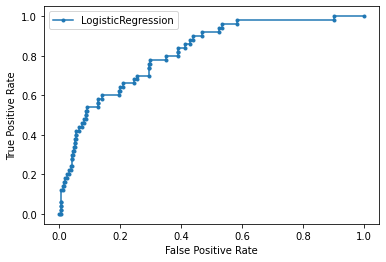

LogisticRegression :
Accuracy Score: 0.7534

K-Fold Validation Mean Accuracy: 79.6865 %

Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.76      0.85       972
           1       0.12      0.66      0.21        50

    accuracy                           0.75      1022
   macro avg       0.55      0.71      0.53      1022
weighted avg       0.94      0.75      0.82      1022


Confusion matrix: 
[[737 235]
 [ 17  33]]

Precision Score: 0.9357

Recall Score: 0.7534

F1 score: 0.8224
-----------------------------------



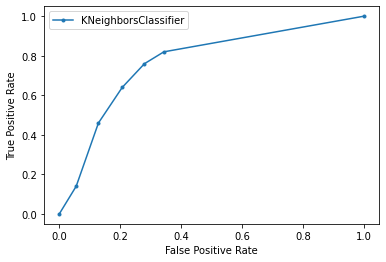

KNeighborsClassifier :
Accuracy Score: 0.7857

K-Fold Validation Mean Accuracy: 86.5903 %

Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.79      0.88       972
           1       0.14      0.64      0.23        50

    accuracy                           0.79      1022
   macro avg       0.56      0.72      0.55      1022
weighted avg       0.94      0.79      0.84      1022


Confusion matrix: 
[[771 201]
 [ 18  32]]

Precision Score: 0.9361

Recall Score: 0.7857

F1 score: 0.8439
-----------------------------------



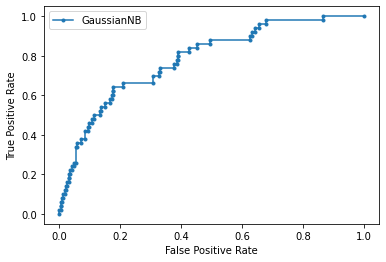

GaussianNB :
Accuracy Score: 0.6634

K-Fold Validation Mean Accuracy: 77.6677 %

Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.66      0.79       972
           1       0.10      0.74      0.18        50

    accuracy                           0.66      1022
   macro avg       0.54      0.70      0.48      1022
weighted avg       0.94      0.66      0.76      1022


Confusion matrix: 
[[641 331]
 [ 13  37]]

Precision Score: 0.9371

Recall Score: 0.6634

F1 score: 0.7585
-----------------------------------



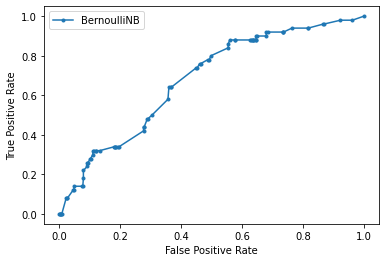

BernoulliNB :
Accuracy Score: 0.5470

K-Fold Validation Mean Accuracy: 67.2412 %

Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.54      0.69       972
           1       0.08      0.76      0.14        50

    accuracy                           0.55      1022
   macro avg       0.53      0.65      0.42      1022
weighted avg       0.93      0.55      0.67      1022


Confusion matrix: 
[[521 451]
 [ 12  38]]

Precision Score: 0.9335

Recall Score: 0.5470

F1 score: 0.6654
-----------------------------------



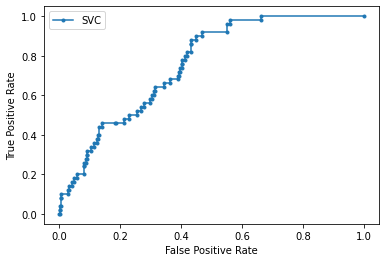

SVC :
Accuracy Score: 0.7710

K-Fold Validation Mean Accuracy: 86.1146 %

Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       972
           1       0.10      0.46      0.16        50

    accuracy                           0.77      1022
   macro avg       0.53      0.62      0.52      1022
weighted avg       0.92      0.77      0.83      1022


Confusion matrix: 
[[765 207]
 [ 27  23]]

Precision Score: 0.9235

Recall Score: 0.7710

F1 score: 0.8330
-----------------------------------



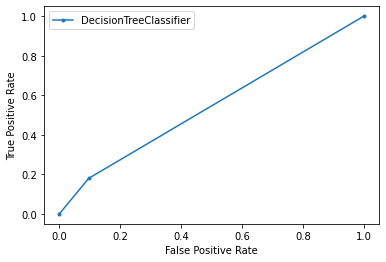

DecisionTreeClassifier :
Accuracy Score: 0.8679

K-Fold Validation Mean Accuracy: 90.9875 %

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       972
           1       0.09      0.18      0.12        50

    accuracy                           0.87      1022
   macro avg       0.52      0.54      0.52      1022
weighted avg       0.91      0.87      0.89      1022


Confusion matrix: 
[[878  94]
 [ 41   9]]

Precision Score: 0.9129

Recall Score: 0.8679

F1 score: 0.8889
-----------------------------------



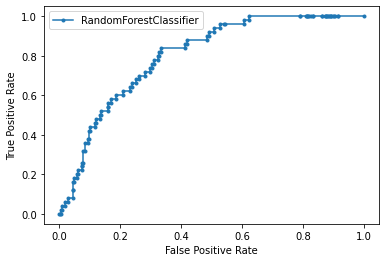

RandomForestClassifier :
Accuracy Score: 0.8914

K-Fold Validation Mean Accuracy: 94.1758 %

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       972
           1       0.16      0.28      0.20        50

    accuracy                           0.89      1022
   macro avg       0.56      0.60      0.57      1022
weighted avg       0.92      0.89      0.91      1022


Confusion matrix: 
[[897  75]
 [ 36  14]]

Precision Score: 0.9221

Recall Score: 0.8914

F1 score: 0.9055
-----------------------------------



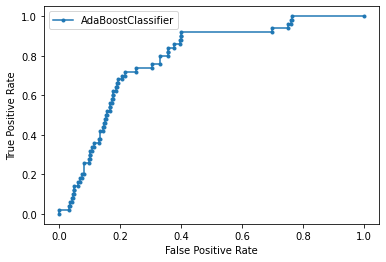

AdaBoostClassifier :
Accuracy Score: 0.8943

K-Fold Validation Mean Accuracy: 94.8830 %

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       972
           1       0.12      0.18      0.14        50

    accuracy                           0.89      1022
   macro avg       0.54      0.56      0.54      1022
weighted avg       0.92      0.89      0.90      1022


Confusion matrix: 
[[905  67]
 [ 41   9]]

Precision Score: 0.9156

Recall Score: 0.8943

F1 score: 0.9045
-----------------------------------



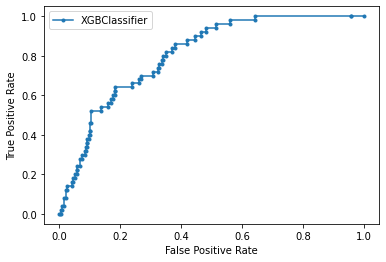

XGBClassifier :
Accuracy Score: 0.9247

K-Fold Validation Mean Accuracy: 96.1174 %

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       972
           1       0.17      0.14      0.15        50

    accuracy                           0.92      1022
   macro avg       0.56      0.55      0.56      1022
weighted avg       0.92      0.92      0.92      1022


Confusion matrix: 
[[938  34]
 [ 43   7]]

Precision Score: 0.9177

Recall Score: 0.9247

F1 score: 0.9211
-----------------------------------



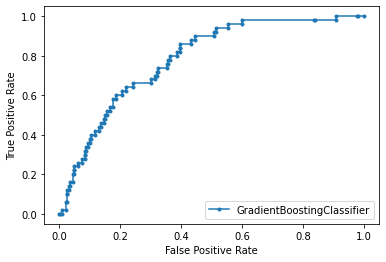

GradientBoostingClassifier :
Accuracy Score: 0.9315

K-Fold Validation Mean Accuracy: 96.6702 %

Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       972
           1       0.14      0.08      0.10        50

    accuracy                           0.93      1022
   macro avg       0.55      0.53      0.53      1022
weighted avg       0.91      0.93      0.92      1022


Confusion matrix: 
[[948  24]
 [ 46   4]]

Precision Score: 0.9141

Recall Score: 0.9315

F1 score: 0.9222
-----------------------------------



In [ ]:
lst_1_tuned= []

for m in range(len(models_tuned)):
    lst_2_tuned= []
    model = models_tuned[m]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = skf)   #K-Fold Validation
    
    test_acc = accuracy_score(y_test, y_pred)

    cr = classification_report(y_test, y_pred)
      
    cm = confusion_matrix(y_test, y_pred)

    precision = precision_score(y_test, y_pred, average= 'weighted')
    recall = recall_score(y_test, y_pred, average= 'weighted')
    f1 = f1_score(y_test, y_pred, average= 'weighted')
    roc = roc_auc_score(y_test, y_pred)

    predicted_probab = model.predict_proba(X_test)
    predicted_probab = predicted_probab[:, 1]

    fpr, tpr, _ = roc_curve(y_test, predicted_probab)
    pyplot.plot(fpr, tpr, marker='.', label = type(models_tuned[m][-1]).__name__)
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.legend()
    pyplot.show()
   
    print(type(models_tuned[m][-1]).__name__ , ':')
    
    print('Accuracy Score: {:.4f}'.format(test_acc))
    print('')
    
    print("K-Fold Validation Mean Accuracy: {:.4f} %".format(accuracies.mean()*100))
    print('')

    print("Classification report: ")
    print(cr)
    print('')

    print("Confusion matrix: ")
    print(cm)
    print('')

    print('Precision Score: {:.4f}'.format(precision))
    print('')

    print('Recall Score: {:.4f}'.format(recall))
    print('')

    print('F1 score: {:.4f}'.format(f1))
    
    print('-----------------------------------')
    print('')
    lst_2_tuned.append(type(models_tuned[m][-1]).__name__)
    lst_2_tuned.append(accuracies.mean())
    lst_2_tuned.append(test_acc)
    lst_2_tuned.append(precision)
    lst_2_tuned.append(recall)
    lst_2_tuned.append(f1)
    lst_1_tuned.append(lst_2_tuned)

In [ ]:
df_tuned = pd.DataFrame(lst_1_tuned, columns= ['Model','Cross-val acc','Test Accuracy','Precision','Recall', 'F1'])
df_tuned.sort_values(by= ['F1'], inplace= True, ascending= False)
df_tuned

,Model,Cross-val acc,Test Accuracy,Precision,Recall,F1
9,GradientBoostingClassifier,0.966702,0.931507,0.914052,0.931507,0.922231
8,XGBClassifier,0.961174,0.924658,0.917741,0.924658,0.921105
6,RandomForestClassifier,0.941758,0.891389,0.922075,0.891389,0.905514
7,AdaBoostClassifier,0.948830,0.894325,0.915650,0.894325,0.904512
5,DecisionTreeClassifier,0.909875,0.867906,0.912920,0.867906,0.888934
1,KNeighborsClassifier,0.865903,0.785714,0.936098,0.785714,0.843863
4,SVC,0.861146,0.771037,0.923546,0.771037,0.832951
0,LogisticRegression,0.796865,0.753425,0.935657,0.753425,0.822371
2,GaussianNB,0.776677,0.663405,0.937090,0.663405,0.758526
3,BernoulliNB,0.672412,0.546967,0.933466,0.546967,0.665384


# Ensembling

In [ ]:
from sklearn.ensemble import StackingClassifier, VotingClassifier, BaggingClassifier

def get_stacking_model():
    # define the base models
    level0 = []
    # level0.append(['Logistic Regression', Pipeline([('mapper', linear_mapper),  
    #                                                 ('classifier', LogisticRegression(random_state = 0))])])
    
    level0.append(['KNN', Pipeline([('mapper', num_mapper),  
                                    ('classifier', KNeighborsClassifier(n_neighbors=5, metric = 'manhattan'))])])
    
    # level0.append(['Gaussian NB', Pipeline([('mapper', mapper), 
    #                                         ('classifier', GaussianNB(var_smoothing= 1e-7))])])
    
    # level0.append(['Bernoulli NB', Pipeline([('mapper', mapper), 
    #                                          ('classifier', BernoulliNB(alpha=100))])])
    
    level0.append(['SVM', Pipeline([('mapper', linear_mapper),  
                                    ('classifier', SVC(C=1, random_state = 0, probability= True))])])
    
    # level0.append(['DT', Pipeline([('mapper', mapper),  
    #                                ('classifier', 
    #                                 DecisionTreeClassifier(criterion='entropy',
    #                                                   max_depth = None,
    #                                                   max_features = None,
    #                                                   min_samples_leaf = 1,
    #                                                   min_samples_split = 2,
    #                                                   random_state = 0)
    #                            )])])
    level0.append(['Random Forest', Pipeline([('mapper', tree_mapper),  
                              ('classifier', RandomForestClassifier(n_estimators = 1000,
                                                      criterion='entropy',
                                                      max_depth = None,
                                                      max_features = 'sqrt',
                                                      min_samples_leaf = 1,
                                                      min_samples_split = 10,
                                                      random_state = 0)
                               )])
    ])
    # level0.append(['Random Forest', RandomForestClassifier(criterion='gini', n_estimators= 200, random_state= 0)])
    # level0.append(['AdaBoost', Pipeline([('mapper', mapper),  
    #                           ('classifier', 
    #                            AdaBoostClassifier(base_estimator= DecisionTreeClassifier(criterion='gini',
    #                                                   max_depth = 30,
    #                                                   max_features = 'log2',
    #                                                   min_samples_leaf = 5,
    #                                                   min_samples_split = 15,
    #                                                   random_state = 0),
    #                                               learning_rate = 0.1,
    #                                               n_estimators = 500)
    #                            )])
    # ])
    level0.append(['XGBoost', Pipeline([('mapper', tree_mapper),  
                              ('classifier', XGBClassifier(criterion = 'gini',
                                                           eta = 0.1,
                                                           max_depth = 8,
                                                           n_estimators = 500,
                                                           random_state = 0
                                                           )
                              )])])
    level0.append(['GBT', Pipeline([('mapper', tree_mapper),  
                              ('classifier', GradientBoostingClassifier(n_estimators = 1000,
                                                                        learning_rate= 0.2,
                                                                        max_depth = 8,
                                                                        min_samples_split = 10,
                                                                        min_samples_leaf = 1,
                                                                        max_features = 'auto',
                                                                        random_state = 0)
                              )])
    ])
    

    # define meta learner model
    # level1 = KNeighborsClassifier(n_neighbors= 7)
    level1 = RandomForestClassifier(criterion='gini', n_estimators= 700, random_state= 0)
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=skf)
    return model

In [ ]:
model = get_stacking_model()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = skf)   #K-Fold Validation

test_acc = accuracy_score(y_test, y_pred)

cr = classification_report(y_test, y_pred)
  
cm = confusion_matrix(y_test, y_pred)

precision = precision_score(y_test, y_pred, average= 'weighted')
recall = recall_score(y_test, y_pred, average= 'weighted')
f1 = f1_score(y_test, y_pred, average= 'weighted')

# predicted_probab = model.predict_proba(X_test)
# predicted_probab = predicted_probab[:, 1]

# fpr, tpr, _ = roc_curve(y_test, predicted_probab)
# pyplot.plot(fpr, tpr, marker='.', label='Stacking Ensemble')
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# pyplot.legend()
# pyplot.show()

print('Stacking Ensemble:')

print('Accuracy Score: {:.4f}'.format(test_acc))
print('')

# print("K-Fold Validation Mean Accuracy: {:.4f} %".format(accuracies.mean()*100))
print('')

print("Classification report: ")
print(cr)
print('')

print("Confusion matrix: ")
print(cm)
print('')

print('Precision Score: {:.4f}'.format(precision))
print('')

print('Recall Score: {:.4f}'.format(recall))
print('')

print('F1 score: {:.4f}'.format(f1))

print('-----------------------------------')
print('')

Stacking Ensemble:
Accuracy Score: 0.9354


Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       972
           1       0.06      0.02      0.03        50

    accuracy                           0.94      1022
   macro avg       0.50      0.50      0.50      1022
weighted avg       0.91      0.94      0.92      1022


Confusion matrix: 
[[955  17]
 [ 49   1]]

Precision Score: 0.9074

Recall Score: 0.9354

F1 score: 0.9207
-----------------------------------



In [ ]:
import joblib
joblib.dump(model, 'stacked_model.sav')

['stacked_model.sav']

In [ ]:
model = joblib.load('stacked_model.sav')
model.estimators_

[Pipeline(memory=None,
          steps=[('mapper',
                  ColumnTransformer(n_jobs=None, remainder='drop',
                                    sparse_threshold=0.3,
                                    transformer_weights=None,
                                    transformers=[('num',
                                                   StandardScaler(copy=True,
                                                                  with_mean=True,
                                                                  with_std=True),
                                                   ['age', 'avg_glucose_level',
                                                    'bmi'])],
                                    verbose=False)),
                 ('classifier',
                  KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                       metric='manhattan', metric_params=None,
                                       n_jobs=None, n_neighbors=5, p=2,
              

In [ ]:
list_stack=[]
list_stack.append("Stacking ensemble")
list_stack.append(np.nan)
list_stack.append(test_acc)
list_stack.append(precision)
list_stack.append(recall)
list_stack.append(f1)
final_list = lst_1_tuned
final_list.append(list_stack)

In [ ]:
df_tuned = pd.DataFrame(lst_1_tuned, columns= ['Model','Cross-val acc','Test Accuracy','Precision','Recall', 'F1'])
df_tuned.sort_values(by= ['F1'], inplace= True, ascending= False)
df_tuned

In [ ]:
df_tuned.reset_index(drop= True).iloc[9:].append(
    df_tuned.reset_index(drop= True).iloc[6:8].append(
        df_tuned.reset_index(drop= True).iloc[0])).sort_values(
            by= ['F1'], ascending = False
        ).reset_index(drop = True)

,Model,Cross-val acc,Test Accuracy,Precision,Recall,F1
0,Stacking ensemble,NaN,0.942270,0.916471,0.942270,0.927238
1,GradientBoostingClassifier,0.966702,0.931507,0.914052,0.931507,0.922231
2,XGBClassifier,0.961174,0.924658,0.917741,0.924658,0.921105
3,RandomForestClassifier,0.941758,0.891389,0.922075,0.891389,0.905514
4,AdaBoostClassifier,0.948830,0.894325,0.915650,0.894325,0.904512
5,DecisionTreeClassifier,0.909875,0.867906,0.912920,0.867906,0.888934
6,KNeighborsClassifier,0.865903,0.785714,0.936098,0.785714,0.843863
7,SVC,0.861146,0.771037,0.923546,0.771037,0.832951
8,LogisticRegression,0.796865,0.753425,0.935657,0.753425,0.822371
9,GaussianNB,0.776677,0.663405,0.937090,0.663405,0.758526


# Conclusion



*   Tuning hyperparameters improved performance of our base models greatly
*   Stacking further improved performance, although by a small extent
*   Higher scores can possibly be attained with higher volume and variety, and lower imbalance of data. 

